In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
train_df = pd.read_csv('data/train.csv')
train_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [3]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19219 entries, 0 to 19218
Data columns (total 35 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   id                     19219 non-null  int64  
 1   X_Minimum              19219 non-null  int64  
 2   X_Maximum              19219 non-null  int64  
 3   Y_Minimum              19219 non-null  int64  
 4   Y_Maximum              19219 non-null  int64  
 5   Pixels_Areas           19219 non-null  int64  
 6   X_Perimeter            19219 non-null  int64  
 7   Y_Perimeter            19219 non-null  int64  
 8   Sum_of_Luminosity      19219 non-null  int64  
 9   Minimum_of_Luminosity  19219 non-null  int64  
 10  Maximum_of_Luminosity  19219 non-null  int64  
 11  Length_of_Conveyer     19219 non-null  int64  
 12  TypeOfSteel_A300       19219 non-null  int64  
 13  TypeOfSteel_A400       19219 non-null  int64  
 14  Steel_Plate_Thickness  19219 non-null  int64  
 15  Ed

In [4]:
train_df.shape

(19219, 35)

In [5]:
train_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [6]:
train_df.columns

Index(['id', 'X_Minimum', 'X_Maximum', 'Y_Minimum', 'Y_Maximum',
       'Pixels_Areas', 'X_Perimeter', 'Y_Perimeter', 'Sum_of_Luminosity',
       'Minimum_of_Luminosity', 'Maximum_of_Luminosity', 'Length_of_Conveyer',
       'TypeOfSteel_A300', 'TypeOfSteel_A400', 'Steel_Plate_Thickness',
       'Edges_Index', 'Empty_Index', 'Square_Index', 'Outside_X_Index',
       'Edges_X_Index', 'Edges_Y_Index', 'Outside_Global_Index', 'LogOfAreas',
       'Log_X_Index', 'Log_Y_Index', 'Orientation_Index', 'Luminosity_Index',
       'SigmoidOfAreas', 'Pastry', 'Z_Scratch', 'K_Scatch', 'Stains',
       'Dirtiness', 'Bumps', 'Other_Faults'],
      dtype='object')

In [7]:
len(train_df.columns.where(train_df.isnull().sum() == 0))

35

- There are no missing values in the dataset

In [8]:
train_df.select_dtypes(object).columns

Index([], dtype='object')

- There are no categorical features in the dataset

In [9]:
train_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [10]:
train_df.duplicated().sum()

0

- There are no duplicate values in the dataset

In [11]:
import seaborn as sns

C:\Users\krish\AppData\Local\Temp\ipykernel_25704\1429093876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Dirtiness'])


<Axes: xlabel='Dirtiness', ylabel='Density'>

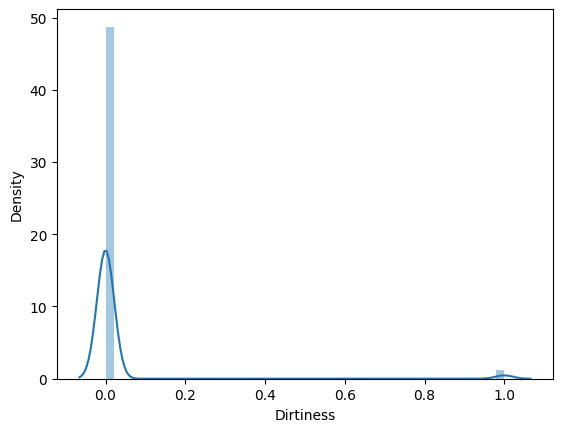

In [12]:
sns.distplot(train_df['Dirtiness'])

- We can infer that the data has many outliers, which should be eliminated.

In [13]:
UCL = train_df['Dirtiness'].mean() + 3*train_df['Dirtiness'].std()
LCL = train_df['Dirtiness'].mean() - 3*train_df['Dirtiness'].std()
print('Highest allowed',UCL)
print('Lowest allowed',LCL)

Highest allowed 0.49576606783599914
Lowest allowed -0.44529517965243076


In [14]:
train_df[(train_df['Dirtiness'] < LCL) | (train_df['Dirtiness'] > UCL)]

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
78,78,498,509,1164921,1164931,112,20,28,12693,106,...,0.7500,-0.0881,0.3197,0,0,0,0,1,0,0
89,89,1427,1455,1095698,1095703,18,14,5,2274,117,...,-0.1667,-0.0071,0.1449,0,0,0,0,1,0,0
111,111,1088,1101,728281,728304,64,16,8,6902,121,...,-0.3000,0.0085,0.2432,0,0,0,0,1,0,0
126,126,923,941,2921961,2921970,270,35,48,348957,101,...,0.8965,-0.0702,0.8705,0,0,0,0,1,0,0
134,134,1595,1611,71768,718425,836,72,87,97183,109,...,0.7712,-0.0947,1.0000,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19034,19034,1122,1134,1779008,1779024,110,15,16,12782,110,...,0.4375,-0.0652,0.2583,0,0,0,0,1,0,0
19108,19108,1041,1059,2339627,2339797,3811,70,35,479531,91,...,0.8087,-0.1461,0.9956,0,0,0,0,1,0,0
19119,19119,805,816,1148345,1148364,56,8,8,7145,125,...,-0.1111,0.0391,0.1773,0,0,0,0,1,0,0
19137,19137,138,151,2086004,2086116,140,16,18,16548,104,...,0.4667,-0.1077,0.4366,0,0,0,0,1,0,0


- These are the outlier in the data

In [15]:
# Trimming the outliers

train_df = train_df[(train_df['Dirtiness'] > LCL) & (train_df['Dirtiness'] < UCL)]
train_df.shape

(18734, 35)

In [12]:
train_df.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
0,0,584,590,909972,909977,16,8,5,2274,113,...,-0.5000,-0.0104,0.1417,0,0,0,1,0,0,0
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.7419,-0.2997,0.9491,0,0,0,0,0,0,1
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,-0.0105,-0.0944,1.0000,0,0,1,0,0,0,0
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.6667,-0.0402,0.4025,0,0,1,0,0,0,0
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.9158,-0.2455,0.9998,0,0,0,0,0,0,1


In [13]:
train_df.describe()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Orientation_Index,Luminosity_Index,SigmoidOfAreas,Pastry,Z_Scratch,K_Scatch,Stains,Dirtiness,Bumps,Other_Faults
count,19219.000000,19219.000000,19219.000000,1.921900e+04,1.921900e+04,19219.000000,19219.000000,19219.000000,1.921900e+04,19219.000000,...,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000,19219.000000
mean,9609.000000,709.854675,753.857641,1.849756e+06,1.846605e+06,1683.987616,95.654665,64.124096,1.918467e+05,84.808419,...,0.102742,-0.138382,0.571902,0.076279,0.059837,0.178573,0.029554,0.025235,0.247828,0.341225
std,5548.191747,531.544189,499.836603,1.903554e+06,1.896295e+06,3730.319865,177.821382,101.054178,4.420247e+05,28.800344,...,0.487681,0.120344,0.332219,0.265450,0.237190,0.383005,0.169358,0.156844,0.431762,0.474133
min,0.000000,0.000000,4.000000,6.712000e+03,6.724000e+03,6.000000,2.000000,1.000000,2.500000e+02,0.000000,...,-0.988400,-0.885000,0.119000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,4804.500000,49.000000,214.000000,6.574680e+05,6.575020e+05,89.000000,15.000000,14.000000,9.848000e+03,70.000000,...,-0.272700,-0.192500,0.253200,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,9609.000000,777.000000,796.000000,1.398169e+06,1.398179e+06,168.000000,25.000000,23.000000,1.823800e+04,90.000000,...,0.111100,-0.142600,0.472900,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,14413.500000,1152.000000,1165.000000,2.368032e+06,2.362511e+06,653.000000,64.000000,61.000000,6.797800e+04,105.000000,...,0.529400,-0.084000,0.999400,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
max,19218.000000,1705.000000,1713.000000,1.298766e+07,1.298769e+07,152655.000000,7553.000000,903.000000,1.159141e+07,196.000000,...,0.991700,0.642100,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


C:\Users\krish\AppData\Local\Temp\ipykernel_27784\1429093876.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(train_df['Dirtiness'])


<Axes: xlabel='Dirtiness', ylabel='Density'>

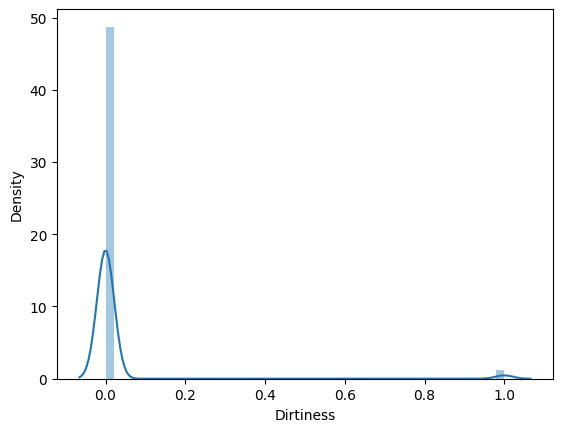

In [14]:
sns.distplot(train_df['Dirtiness'])

<Axes: >

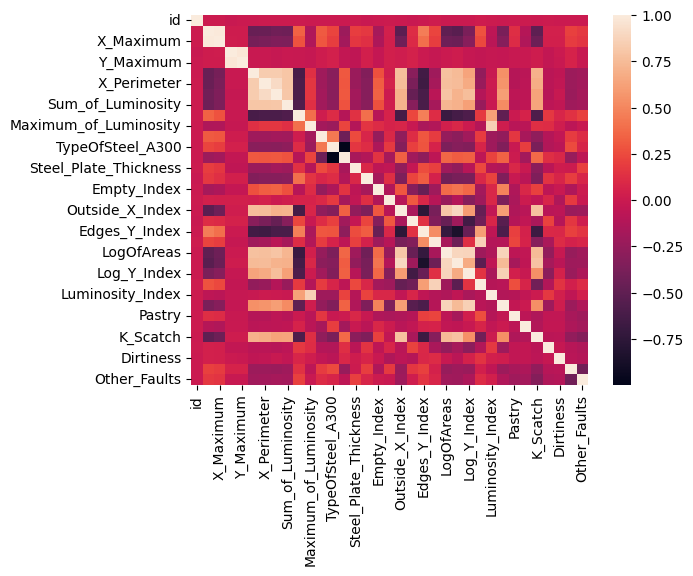

In [15]:
sns.heatmap(train_df.corr())

In [16]:
train_df.shape

(19219, 35)

In [17]:
(train_df.isnull().sum() !=0).values

array([False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [48]:
train_df = train_df.drop('id', axis=1)

In [49]:
train_df.corr()[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']].values

array([[ 0.11930598, -0.10758089, -0.51059738,  0.04615851,  0.04443883,
         0.20512268,  0.16960831],
       [ 0.10880778, -0.12680673, -0.44117736,  0.03682431,  0.03794929,
         0.18693031,  0.15344767],
       [-0.01551197, -0.01214281,  0.0106118 , -0.03915086, -0.00544937,
         0.0564421 , -0.01922713],
       [-0.01628661, -0.01289925,  0.01130392, -0.04087357, -0.00741618,
         0.05660956, -0.01853254],
       [-0.10129464, -0.08156745,  0.70101431, -0.07746981, -0.05354819,
        -0.22403653, -0.19593098],
       [-0.10432179, -0.07043329,  0.67505557, -0.08461524, -0.05018635,
        -0.21828857, -0.18623428],
       [-0.06496528, -0.06209163,  0.63027029, -0.10020419, -0.0193342 ,
        -0.22725605, -0.17458057],
       [-0.09315978, -0.05959759,  0.64059701, -0.07424504, -0.04671243,
        -0.20731555, -0.18465146],
       [-0.00462244,  0.06114601, -0.58695733,  0.16697567,  0.07738595,
         0.13433886,  0.20885693],
       [-0.08609009, -0.0769

-----------------

In [22]:
x = train_df.drop(columns=['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults'], axis=1)
y= train_df[['Pastry','Z_Scratch','K_Scatch','Stains','Dirtiness','Bumps','Other_Faults']]

In [23]:
x.head()

,id,X_Minimum,X_Maximum,Y_Minimum,Y_Maximum,Pixels_Areas,X_Perimeter,Y_Perimeter,Sum_of_Luminosity,Minimum_of_Luminosity,...,Outside_X_Index,Edges_X_Index,Edges_Y_Index,Outside_Global_Index,LogOfAreas,Log_X_Index,Log_Y_Index,Orientation_Index,Luminosity_Index,SigmoidOfAreas
0,0,584,590,909972,909977,16,8,5,2274,113,...,0.0059,1.0000,1.0000,0.0,1.2041,0.9031,0.6990,-0.5000,-0.0104,0.1417
1,1,808,816,728350,728372,433,20,54,44478,70,...,0.0044,0.2500,1.0000,1.0,2.6365,0.7782,1.7324,0.7419,-0.2997,0.9491
2,2,39,192,2212076,2212144,11388,705,420,1311391,29,...,0.1077,0.2363,0.3857,0.0,4.0564,2.1790,2.2095,-0.0105,-0.0944,1.0000
3,3,781,789,3353146,3353173,210,16,29,3202,114,...,0.0044,0.3750,0.9310,1.0,2.3222,0.7782,1.4314,0.6667,-0.0402,0.4025
4,4,1540,1560,618457,618502,521,72,67,48231,82,...,0.0192,0.2105,0.9861,1.0,2.7694,1.4150,1.8808,0.9158,-0.2455,0.9998


In [24]:
x.shape

(19219, 28)

In [25]:
y.shape

(19219, 7)

In [26]:
# splitting into test and train set
from sklearn.model_selection import train_test_split

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)

In [27]:
x_train.shape, x_test.shape, y_train.shape, y_test.shape

((15375, 28), (3844, 28), (15375, 7), (3844, 7))

In [28]:
# Scalling the dataset

from sklearn.preprocessing import StandardScaler

std = StandardScaler()

x_train = std.fit_transform(x_train)

In [29]:
x_test = std.transform(x_test)

##### Building Models

In [30]:
from sklearn.metrics import mean_squared_error, r2_score, accuracy_score, roc_auc_score

def evaluate_model(y_true, y_pred):
    # mse = mean_squared_error(y_true, y_pred)
    accuracy = roc_auc_score(y_true, y_pred)
    r2 = r2_score(y_true, y_pred)

    return  accuracy, r2

In [31]:
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.svm import SVR
##### Building Models

In [32]:
lr = LinearRegression()
lr.fit(x_train, y_train)

lr_train_pred = lr.predict(x_train)
# print(evaluate_model(y_train,lr_train_pred))

MSE, R2 = evaluate_model(y_train, lr_train_pred)
print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

lr_test_pred = lr.predict(x_test)
MSE, R2 = evaluate_model(y_test, lr_test_pred)
print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))

TRAINING | MSE : 0.8519658963984545 | R2 : 0.2263547959121736 
TESTING | MSE : 0.8571175792592681 | R2 : 0.2261402324454584 


In [33]:
dt = DecisionTreeRegressor()

dt.fit(x_train, y_train)

dt_train_pred = dt.predict(x_train)
MSE, R2 = evaluate_model(y_train, dt_train_pred)
print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

dt_test_pred = dt.predict(x_test)
MSE, R2 = evaluate_model(y_test, dt_test_pred)
print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))

TRAINING | MSE : 1.0 | R2 : 1.0 
TESTING | MSE : 0.6730558535655847 | R2 : -0.40436225086251004 


In [34]:
rf = RandomForestRegressor()

rf.fit(x_train, y_train)

rf_train_pred = rf.predict(x_train)
MSE, R2 = evaluate_model(y_train, rf_train_pred)
print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

rf_test_pred = rf.predict(x_test)
MSE, R2 = evaluate_model(y_test, rf_test_pred)
print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))


TRAINING | MSE : 1.0 | R2 : 0.9067204980560304 
TESTING | MSE : 0.8685503053212054 | R2 : 0.3025565868089747 


In [35]:
gb = GradientBoostingRegressor()

gb.fit(x_train, y_train)

gb_train_pred = gb.predict(x_train)

MSE, R2 = evaluate_model(y_train, gb_train_pred)

print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

gb_test_pred = gb.predict(x_test)

MSE, R2 = evaluate_model(y_test, gb_test_pred)

print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))

ValueError: y should be a 1d array, got an array of shape (15375, 7) instead.

In [ ]:
svr = SVR()

svr.fit(x_train, y_train)

svr_train_pred = svr.predict(x_train)

MSE, R2 = evaluate_model(y_train, svr_train_pred)

print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

svr_test_pred = svr.predict(x_test)

MSE, R2 = evaluate_model(y_test, svr_test_pred)

print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))


ValueError: y should be a 1d array, got an array of shape (14987, 7) instead.

In [ ]:
%pip install XGBoost

Note: you may need to restart the kernel to use updated packages.


In [36]:
from xgboost import XGBRegressor

xgb = XGBRegressor()

xgb.fit(x_train, y_train)

xgb_train_pred = xgb.predict(x_train)
MSE, R2 = evaluate_model(y_train, xgb_train_pred)
print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

xgb_test_pred = xgb.predict(x_test)
MSE, R2 = evaluate_model(y_test, xgb_test_pred)
print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))

TRAINING | MSE : 0.9956311490064519 | R2 : 0.8433297682905545 
TESTING | MSE : 0.8351272864171937 | R2 : 0.24502095052659648 


In [44]:
from catboost import CatBoostRegressor

cat = CatBoostRegressor(loss_function='MultiRMSE')

cat.fit(x_train, y_train)

cat_train_pred = cat.predict(x_train)

MSE, R2 = evaluate_model(y_train, cat_train_pred)

print("TRAINING | MSE : {} | R2 : {} ".format(MSE, R2))

cat_test_pred = cat.predict(x_test)

MSE, R2 = evaluate_model(y_test, cat_test_pred)

print("TESTING | MSE : {} | R2 : {} ".format(MSE, R2))

CatBoostError: C:/Go_Agent/pipelines/BuildMaster/catboost.git/catboost/libs/metrics/metric.cpp:6745: All train targets are equal